# NLP Learning
The goal here is to experiment with NLP modules to see how they could apply to creatify

In [14]:
import svgling

In [7]:
import nltk
# install popular packages
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""

In [6]:
tokens = nltk.word_tokenize(sentence)

In [7]:
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

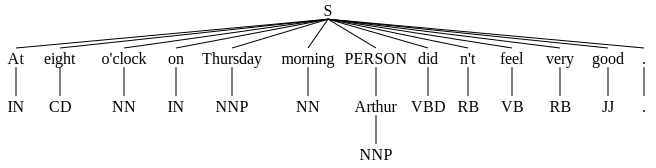

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities

In [16]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

## Actaul Work

In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def preprocess_lyrics(lyrics):
    # Tokenize the lyrics into sentences
    sentences = sent_tokenize(lyrics)
    
    # Tokenize each sentence into words
    words = [word_tokenize(sentence) for sentence in sentences]
    
    # Remove stop words and stem the remaining words
    stemmed_words = []
    for sentence in words:
        for word in sentence:
            if word.lower() not in stop_words:
                stemmed_word = stemmer.stem(word)
                stemmed_words.append(stemmed_word)
    
    # Combine the stemmed words into a single string
    preprocessed_lyrics = ' '.join(stemmed_words)
    
    return preprocessed_lyrics


In [3]:
from nltk.probability import FreqDist

preprocessed_lyrics_list = []

# Combine the preprocessed lyrics from all the songs into a single string
all_lyrics = ' '.join(preprocessed_lyrics_list)

# Tokenize the lyrics into individual words
all_words = word_tokenize(all_lyrics)

# Calculate the frequency distribution of the words
freq_dist = FreqDist(all_words)

# Get the 10 most common words
most_common_words = freq_dist.most_common(10)

print(most_common_words)


[]


## Sentimement Analysis

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_score(lyrics):
    preprocessed_lyrics = preprocess_lyrics(lyrics)
    sentiment_scores = sia.polarity_scores(preprocessed_lyrics)
    return sentiment_scores


In [11]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

In [16]:
from gensim import corpora, models

def get_topics(lyrics):
    preprocessed_lyrics = preprocess_lyrics(lyrics)
    
    # Create a dictionary from the preprocessed lyrics
    dictionary = corpora.Dictionary([preprocessed_lyrics])
    
    # Create a bag-of-words representation of the preprocessed lyrics
    bow_corpus = [dictionary.doc2bow(preprocessed_lyrics)]
    
    # Train an LDA model on the bag-of-words corpus
    lda_model = models.LdaModel(bow_corpus, num_topics=5, id2word=dictionary, passes=10)
    
    # Get the top 3 topics for the lyrics
    topics = lda_model.show_topics(num_topics=3, num_words=5, formatted=False)
    
    return topics




RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 